In [28]:
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# Loading in the JSON data
with open('search_keywords.json', 'r') as file:
    data = json.load(file)

# A Function to filter the data by the last "n" days
def filter_last_n_days(data, n):
    today = datetime.now()
    start_date = today - timedelta(days=n)
    filtered_data = [] # Initializing an empty list to store the filtered data/keywords
    for keyword_data in data['details']: # Iterating through each keyword 
        filtered_elements = [] # Initializing an empty list to store the filtered elements
        for element in keyword_data['elements']: # Iterating through each element of the keyword
            element_date = datetime.strptime(element['date'], '%Y-%m-%d') # Converting date string to a datetime object
            if element_date >= start_date: # Checking to see if the element's date is within the "n" days
                filtered_elements.append(element)
        if filtered_elements: # Checking to see if there are filtered elements for the keyword 
            filtered_keyword_data = keyword_data.copy() # Making a copy of the keyword data
            filtered_keyword_data['elements'] = filtered_elements # Updating the elements with filtered elements
            filtered_data.append(filtered_keyword_data)
    return filtered_data

In [29]:
# User input for the value of "n"
n = int(input("Enter the value of n for the last 'n' days: "))

# Filter data for the last "n" days
filtered_data = filter_last_n_days(data, n)

In [30]:
# Calculating the total count for each keyword within the filtered data
keyword_counts = {} # Initializing an empty dictionary to store keyword counts
for keyword_data in filtered_data: # Iterating through each filtered keyword
    keyword = keyword_data['searchKeyword'] # Getting the keyword
    keyword_count = sum(element['count'] for element in keyword_data['elements']) # Calculating total count for the keyword
    keyword_counts[keyword] = keyword_count # Storing the keyword count in the dictionary

# Select the 10 most common keywords
top_keywords = sorted(keyword_counts.items(), key=lambda x: x[1], reverse=True)[:10]

Keyword: hibob, Total Count: 20
Keyword: hr, Total Count: 19
Keyword: workday, Total Count: 9
Keyword: bamboo hr, Total Count: 8
Keyword: paylocity, Total Count: 8
Keyword: adp, Total Count: 7
Keyword: greenhouse, Total Count: 6
Keyword: jumpcloud, Total Count: 5
Keyword: hire, Total Count: 4
Keyword: azure assets, Total Count: 4


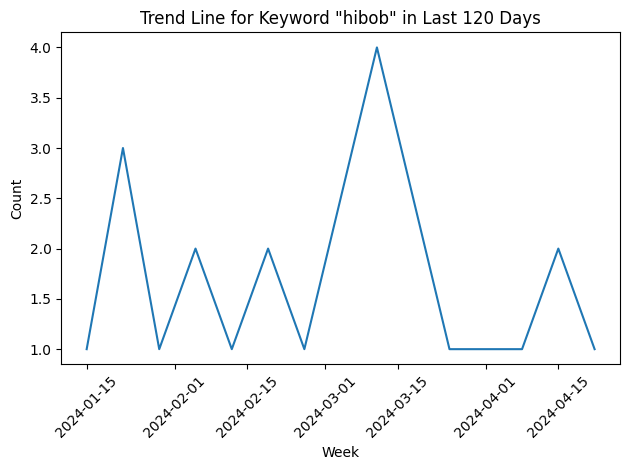

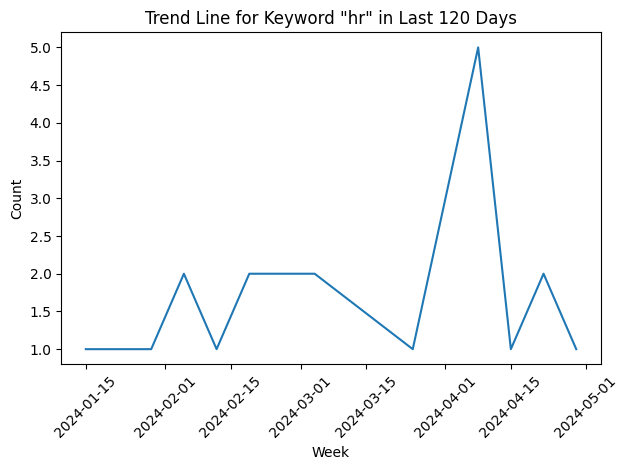

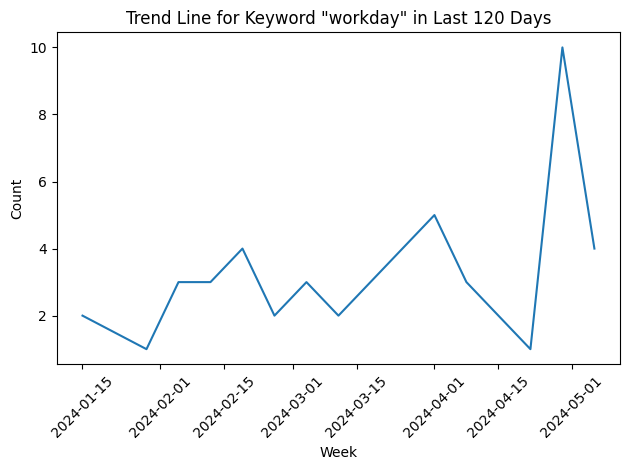

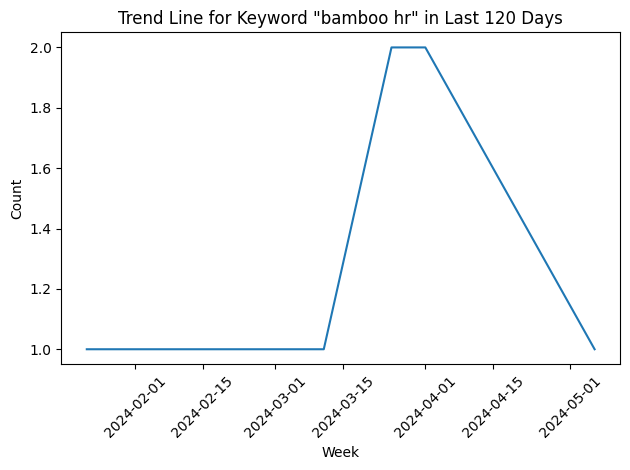

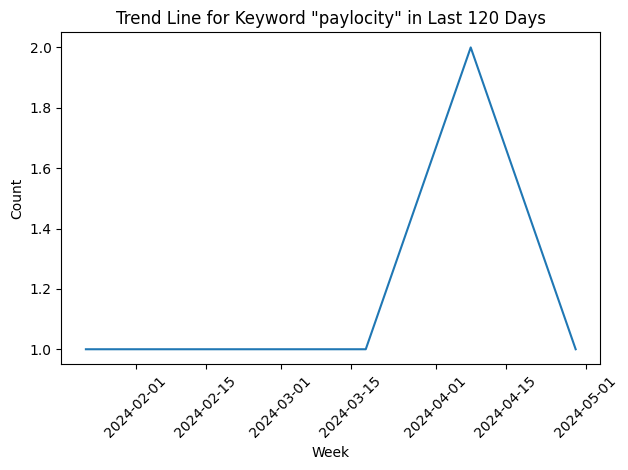

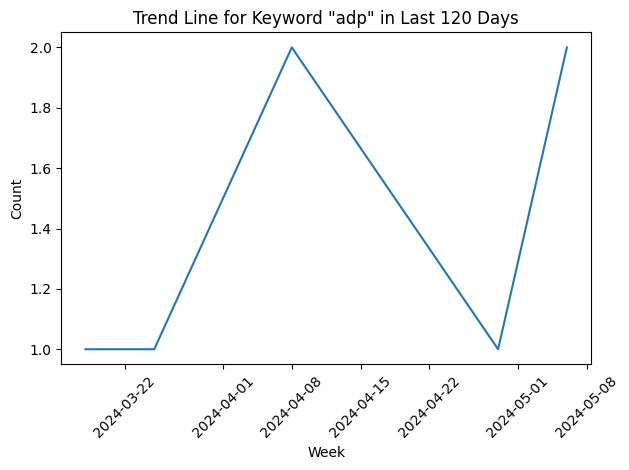

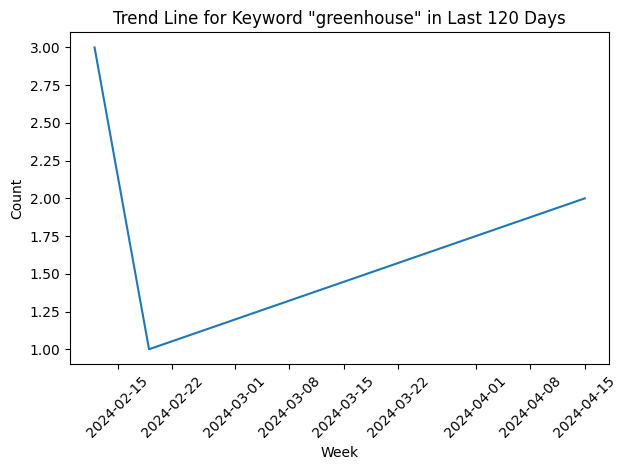

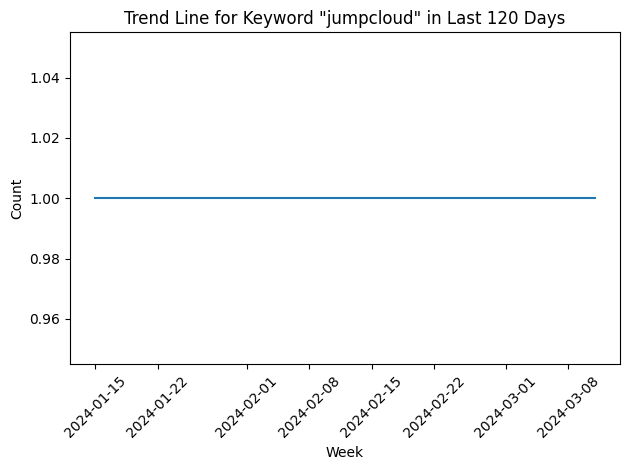

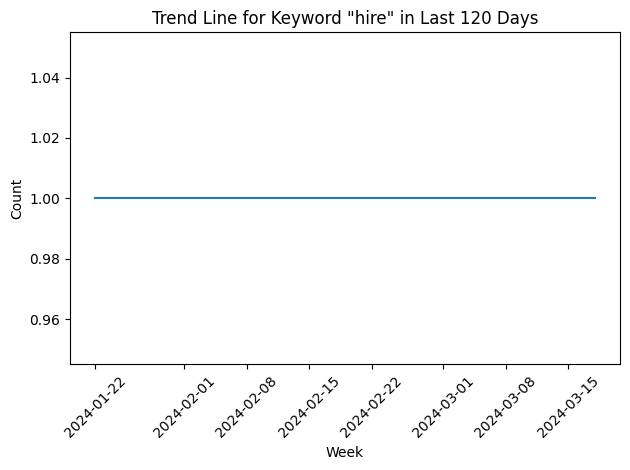

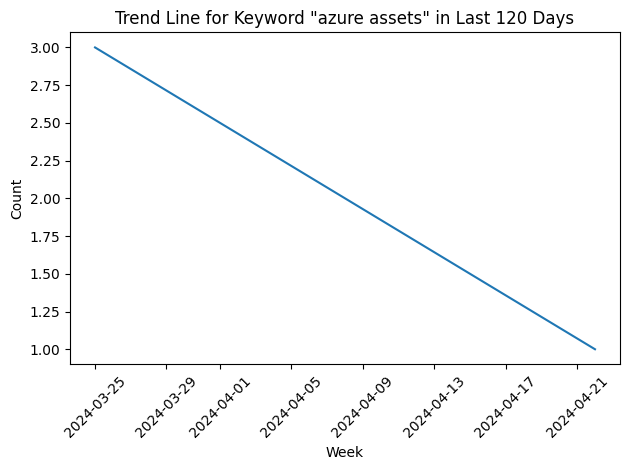

In [31]:
# Creating separate plots for each of the top keywords
for keyword, total_count in top_keywords: # Iterating through each top keyword and its total count
    counts_by_week = {} # Initializing an empty dictionary to store counts by week
    for element in next(item['elements'] for item in filtered_data if item['searchKeyword'] == keyword): # Finding the elements for the keyword
        element_date = datetime.strptime(element['date'], '%Y-%m-%d') # Converting the date string to datetime object
        week_start = element_date - timedelta(days=element_date.weekday()) # Calculating the start of the week
        if week_start not in counts_by_week: # Checking to see if the week start is not in counts_by_week
            counts_by_week[week_start] = 0 # Initializing the count for the week to 0
        counts_by_week[week_start] += element['count'] # Updating the count for the week with element's count
    
    # Sort the counts by week for plotting
    sorted_counts = sorted(counts_by_week.items()) # Sorting the counts by week
    weeks, counts = zip(*sorted_counts) # Unpacking the sorted counts into separate lists for weeks and counts
    
    # Create a new figure for each keyword
    plt.figure()
    plt.plot(weeks, counts)
    plt.xlabel('Week')
    plt.ylabel('Count')
    plt.title(f'Trend Line for Keyword "{keyword}" in Last {n} Days')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the keyword name and total count on the output screen
    print(f'Keyword: {keyword}, Total Count: {total_count}')

# Show the plots
plt.show()